In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [89]:
df=pd.read_csv("agricultural_yield_test.csv")

In [90]:
df

Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  \
0        93.304721             0                        132.522218   
1        83.674653             1                         57.283997   
2        65.963033             1                        227.895479   
3        78.692834             1                        176.314126   
4        72.415684             1                        160.070418   
...            ...           ...                               ...   
3995     95.094714             1                        124.108262   
3996     53.256984             0                        100.310322   
3997     94.145522             1                        196.473704   
3998     61.452120             1                         80.618357   
3999     55.195906             0                        122.473239   

      Sunny_Days  Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
0      96.670922   602.386237                    3            278.986563  
1      99.007556   466.518251                    8            836.434840  
2     104.844272   510.320495                    4            785.881787  
3      90.136191   354.350914                    5            807.884526  
4     101.221668   443.993788                   10           1064.542374  
...          ...          ...                  ...                   ...  
3995   98.970659   496.705800                    5            802.209345  
3996  111.448947   667.056391                    8            509.646540  
3997  110.003474   458.241408                    3            776.013634  
3998   97.815517   778.652540                    4            502.319484  
3999   90.311720   582.999003                    4            257.032544  

[4000 rows x 7 columns]

In [91]:
df.shape

(4000, 7)

In [5]:
df.head(5)

Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
0     93.304721             0                        132.522218   96.670922   
1     83.674653             1                         57.283997   99.007556   
2     65.963033             1                        227.895479  104.844272   
3     78.692834             1                        176.314126   90.136191   
4     72.415684             1                        160.070418  101.221668   

   Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
0   602.386237                    3            278.986563  
1   466.518251                    8            836.434840  
2   510.320495                    4            785.881787  
3   354.350914                    5            807.884526  
4   443.993788                   10           1064.542374

In [92]:
df.tail(5)

Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  \
3995     95.094714             1                        124.108262   
3996     53.256984             0                        100.310322   
3997     94.145522             1                        196.473704   
3998     61.452120             1                         80.618357   
3999     55.195906             0                        122.473239   

      Sunny_Days  Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
3995   98.970659   496.705800                    5            802.209345  
3996  111.448947   667.056391                    8            509.646540  
3997  110.003474   458.241408                    3            776.013634  
3998   97.815517   778.652540                    4            502.319484  
3999   90.311720   582.999003                    4            257.032544

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      4000 non-null   float64
 1   Seed_Variety                      4000 non-null   int64  
 2   Fertilizer_Amount_kg_per_hectare  4000 non-null   float64
 3   Sunny_Days                        4000 non-null   float64
 4   Rainfall_mm                       4000 non-null   float64
 5   Irrigation_Schedule               4000 non-null   int64  
 6   Yield_kg_per_hectare              4000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 218.9 KB


In [94]:
df.skew()

Soil_Quality                        0.006636
Seed_Variety                       -0.892796
Fertilizer_Amount_kg_per_hectare    0.000470
Sunny_Days                          0.067236
Rainfall_mm                        -0.006844
Irrigation_Schedule                 0.451853
Yield_kg_per_hectare               -0.178340
dtype: float64

In [96]:
df.isnull().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

In [97]:
df.duplicated().sum()

np.int64(0)

In [98]:
df.describe()

Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  \
count   4000.000000    4000.00000                       4000.000000   
mean      74.924952       0.70375                        173.447166   
std       14.496298       0.45666                         72.298671   
min       50.003622       0.00000                         50.062655   
25%       62.380142       0.00000                        108.734463   
50%       74.630855       1.00000                        175.596395   
75%       87.792071       1.00000                        235.200606   
max       99.998898       1.00000                        299.992054   

        Sunny_Days  Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
count  4000.000000  4000.000000          4000.000000           4000.000000  
mean     99.841525   502.246625             4.977500            709.167849  
std       9.888547    99.222767             2.259816            199.497621  
min      66.724469   102.007518             0.000000            108.252421  
25%      93.101146   435.810131             3.000000            576.382146  
50%      99.762840   502.877959             5.000000            722.532738  
75%     106.447769   568.249383             6.000000            847.814106  
max     138.520202   876.694217            15.000000           1406.110705

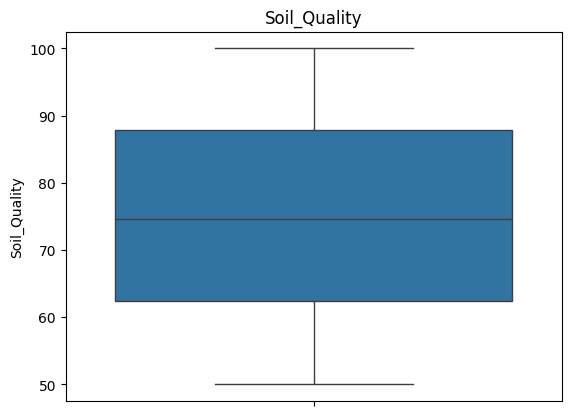

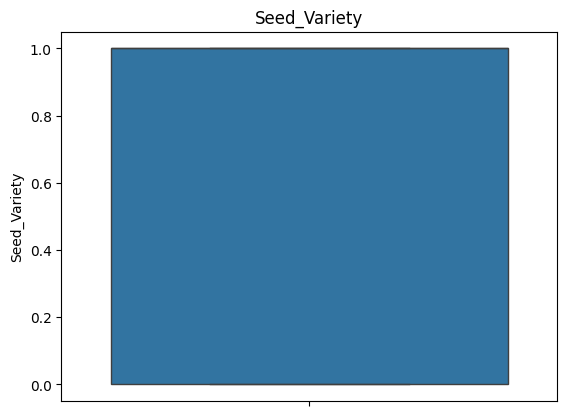

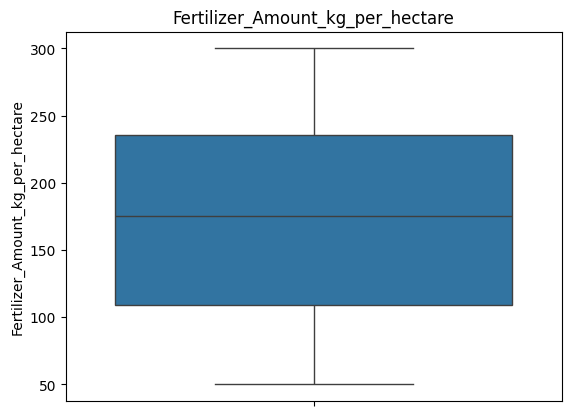

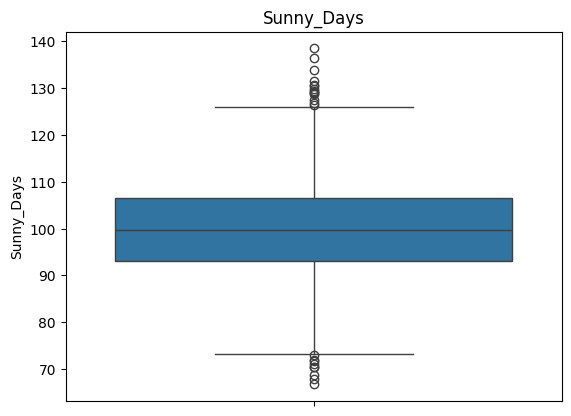

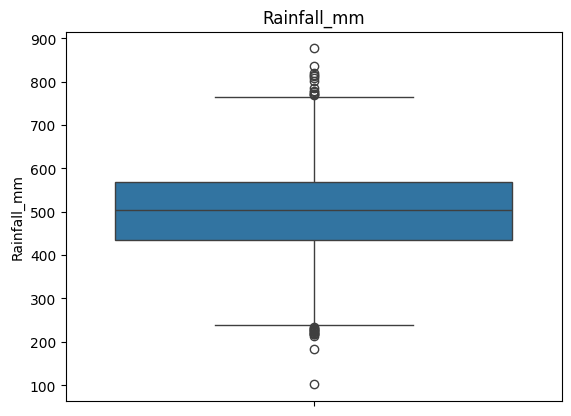

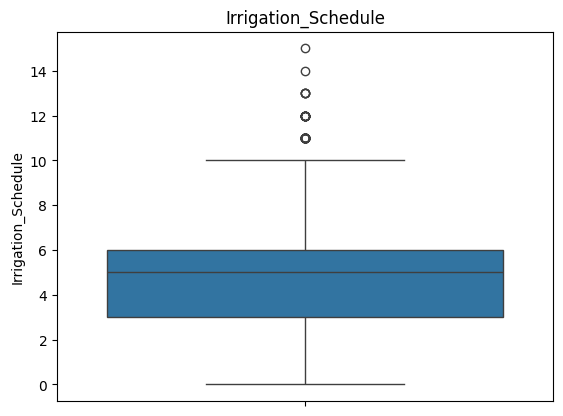

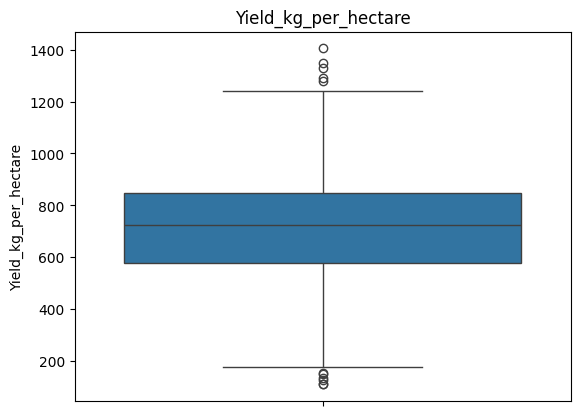

In [99]:
for i in df:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [100]:
def outliers(df):
  for i in df.select_dtypes(exclude='object'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    Iqr=q3-q1
    Lower=q1-Iqr*1.5
    Upper=q3+Iqr*1.5
    Outliers1=(df[i]<Lower)|(df[i]>Upper)
    print(Outliers1.sum())
outliers(df)

0
0
0
23
28
61
11


In [101]:
!pip install feature_engine

In [102]:
from feature_engine.outliers import Winsorizer

In [103]:
Winsor=Winsorizer(capping_method='iqr',tail='both',variables=list(df.columns))

In [104]:
df_win=Winsor.fit_transform(df)

In [122]:
def outliers(df):
  for i in df.select_dtypes(exclude='object'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    Iqr=q3-q1
    Lower=q1-Iqr*1.5
    Upper=q3+Iqr*1.5
    Outliers1=(df[i]<Lower)|(df[i]>Upper)
    print(Outliers1.sum())
outliers(df_win)

0
0
0
0
0
0
0


In [108]:
def outliers5(df):
  outer=set()
  for i in df.select_dtypes(exclude='object'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    Iqr=q3-q1
    Lower=q1-Iqr*1.5
    Upper=q3+Iqr*1.5
    Outliers1=df[(df[i]<Lower)|(df[i]>Upper)].index
    outer.update(Outliers1)
  return df.drop(index=Outliers1)
df_drop=outliers5(df)

In [109]:
def outliers(df):
  for i in df.select_dtypes(exclude='object'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    Iqr=q3-q1
    Lower=q1-Iqr*1.5
    Upper=q3+Iqr*1.5
    Outliers1=(df[i]<Lower)|(df[i]>Upper)
    print(Outliers1.sum())
outliers(df_drop)

0
0
0
23
28
56
0


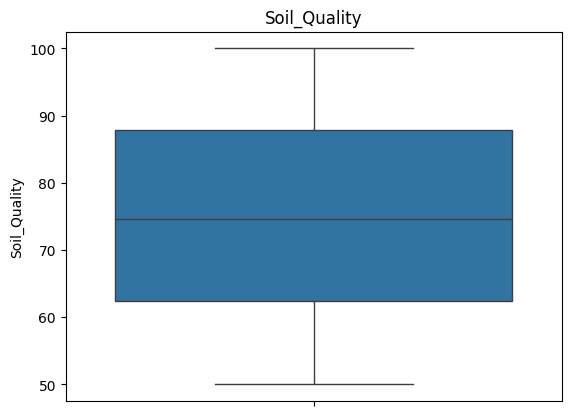

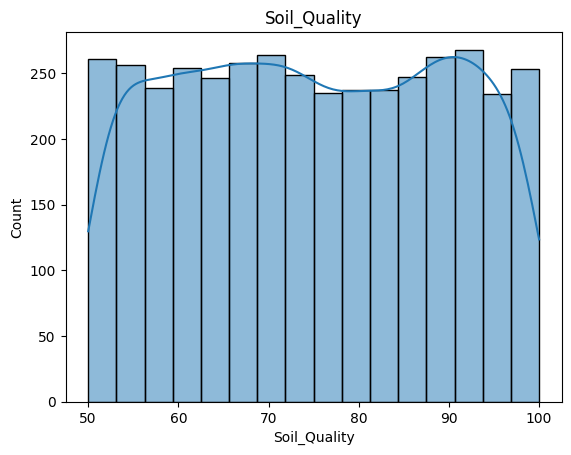

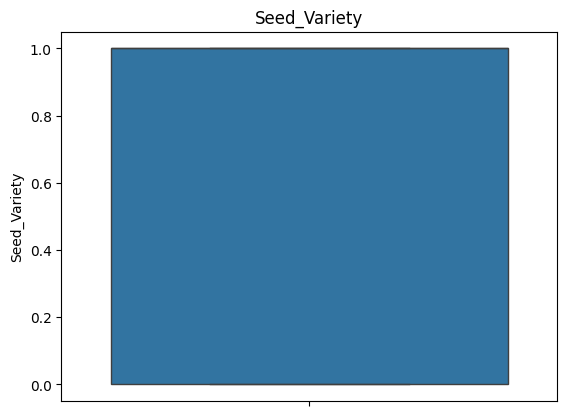

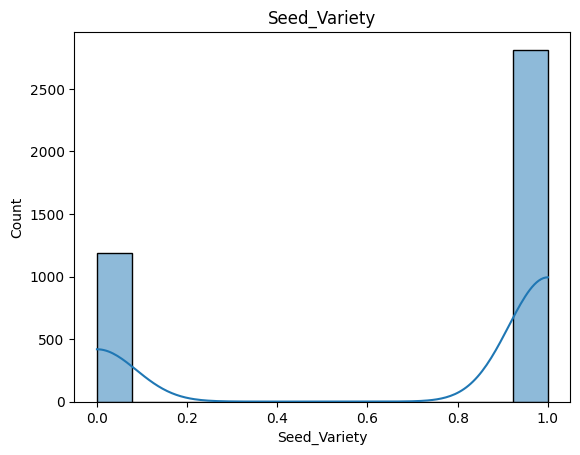

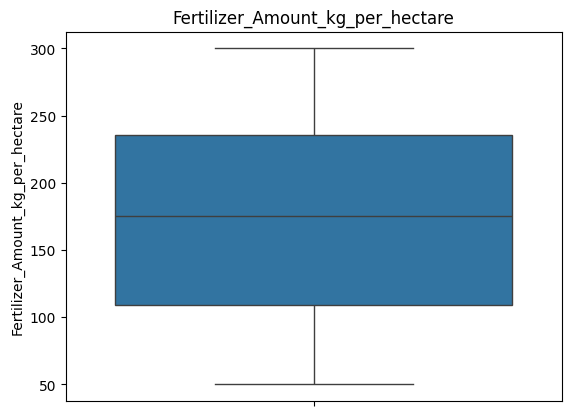

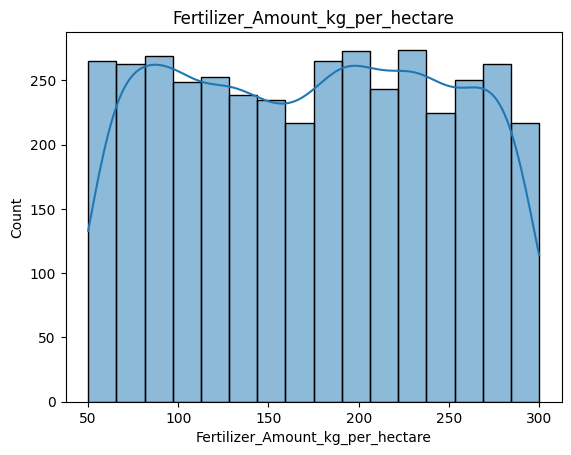

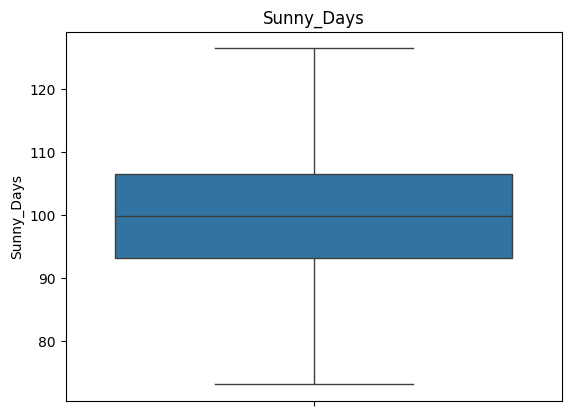

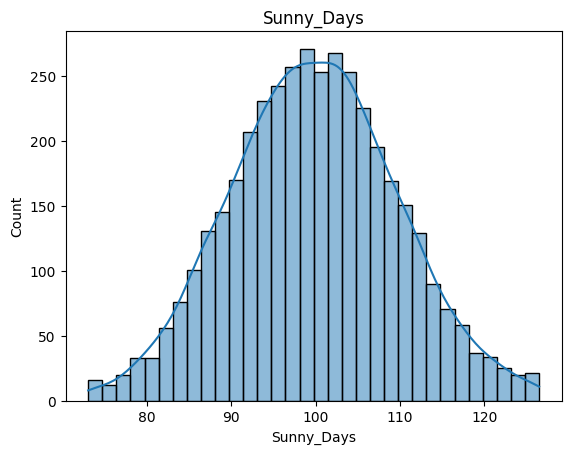

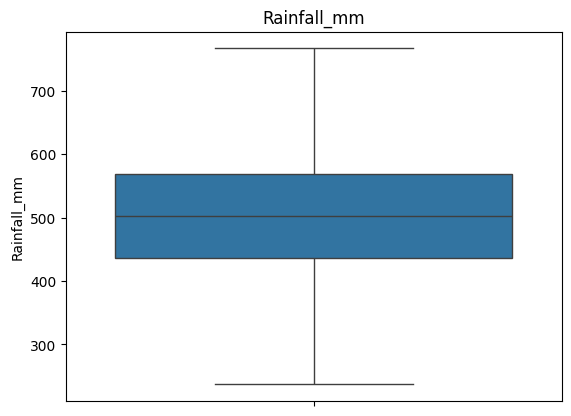

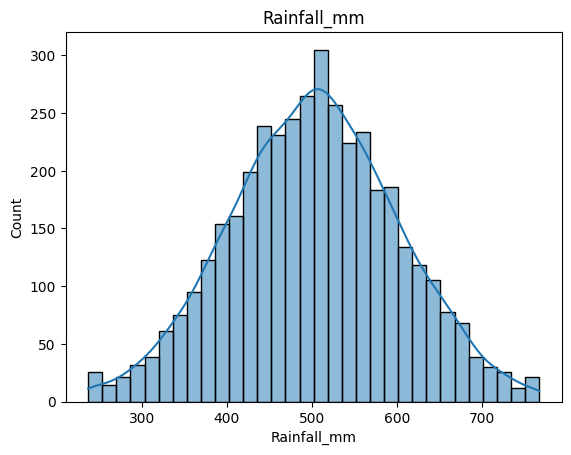

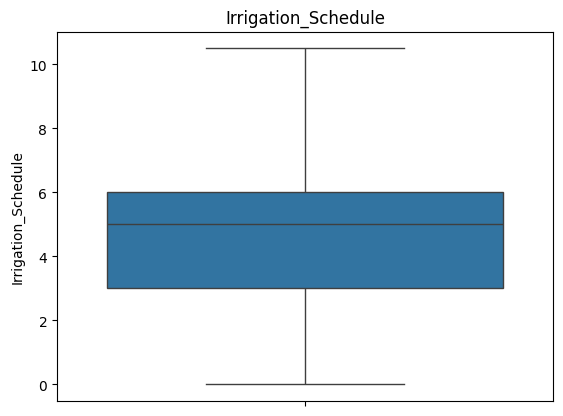

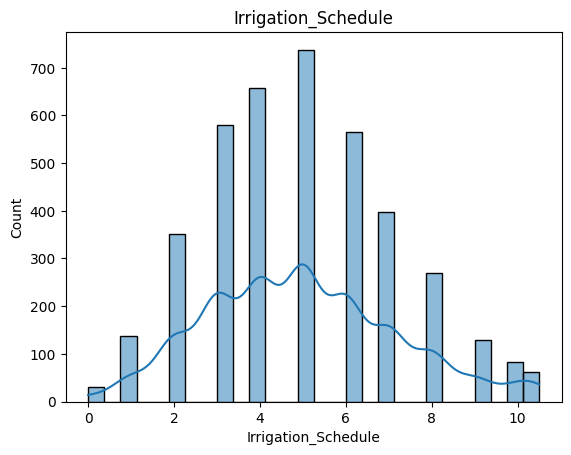

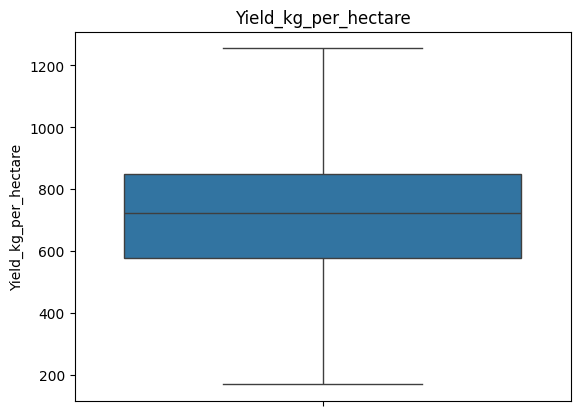

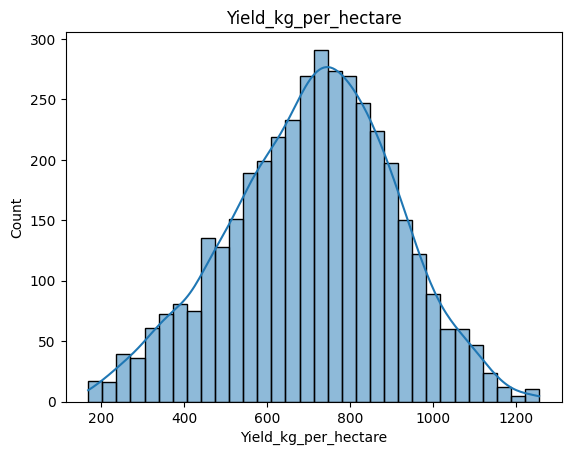

In [111]:
for i in df_win:
  sns.boxplot(df_win[i])
  plt.title(i)
  plt.show()
  sns.histplot(df_win[i],kde=True)
  plt.title(i)
  plt.show()

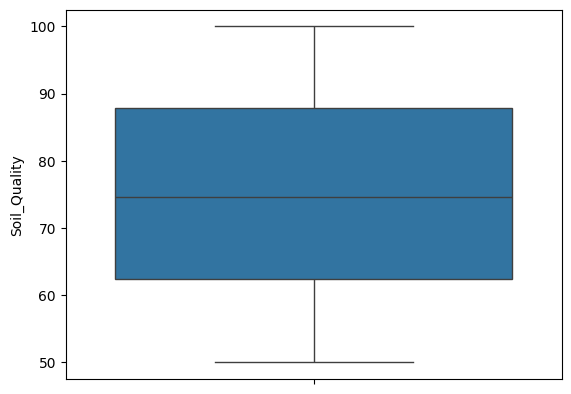

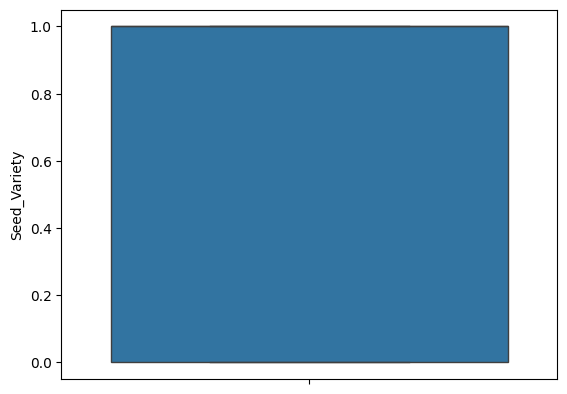

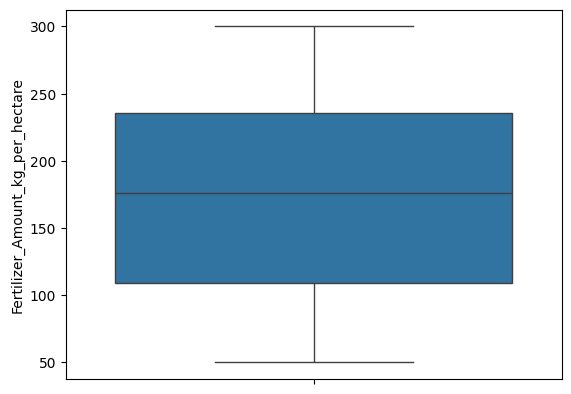

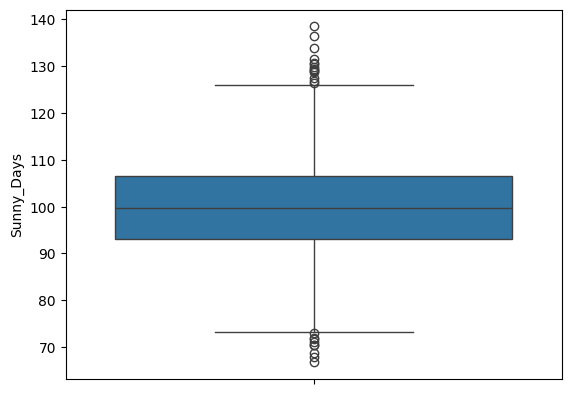

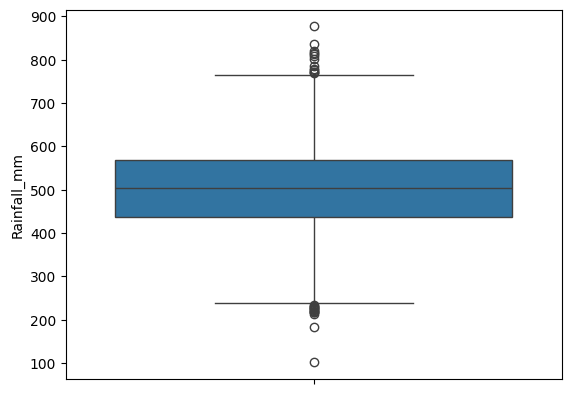

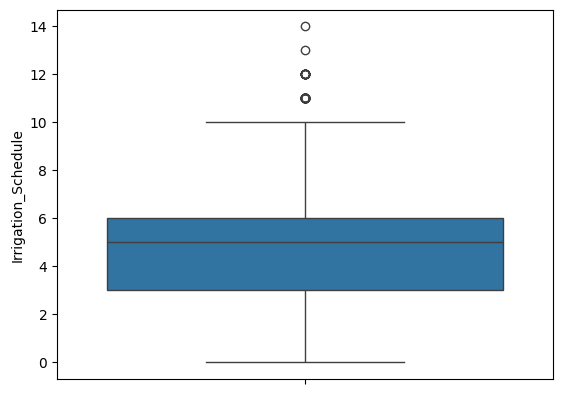

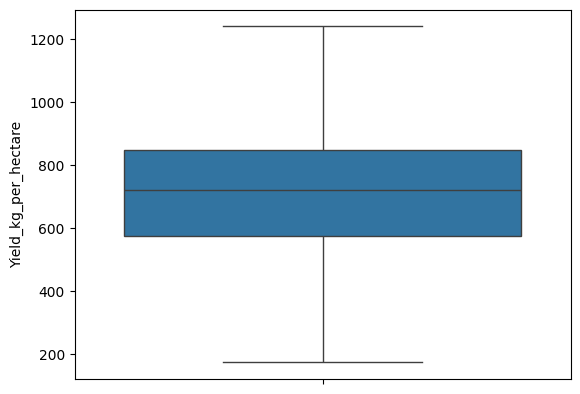

In [112]:
for i in df_drop:
  sns.boxplot(df_drop[i])
  plt.show()

In [113]:
def outliers5(df):
  outer=set()
  for i in df.select_dtypes(exclude='object'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    Iqr=q3-q1
    Lower=q1-Iqr*1.5
    Upper=q3+Iqr*1.5
    Outliers1=df[(df[i]<Lower)|(df[i]>Upper)].index
    outer.update(Outliers1)
  return df.drop(index=Outliers1)
df_drop2=outliers5(df_drop)

In [114]:
def outliers(df):
  for i in df.select_dtypes(exclude='object'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    Iqr=q3-q1
    Lower=q1-Iqr*1.5
    Upper=q3+Iqr*1.5
    Outliers1=(df[i]<Lower)|(df[i]>Upper)
    print(Outliers1.sum())
outliers(df_drop2)

0
0
0
23
28
56
0


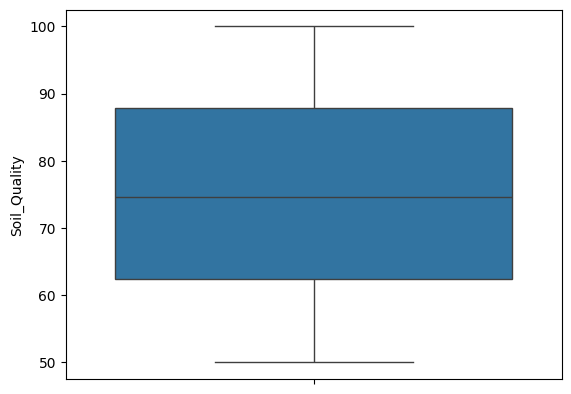

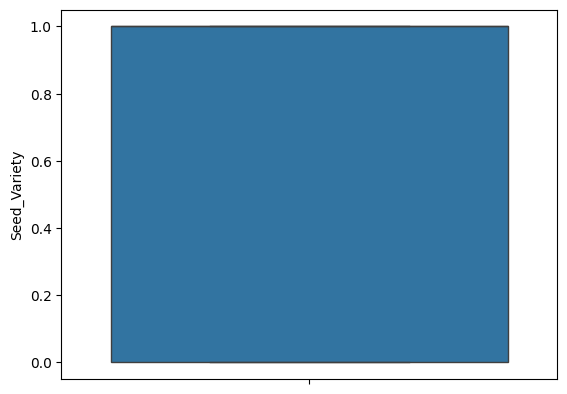

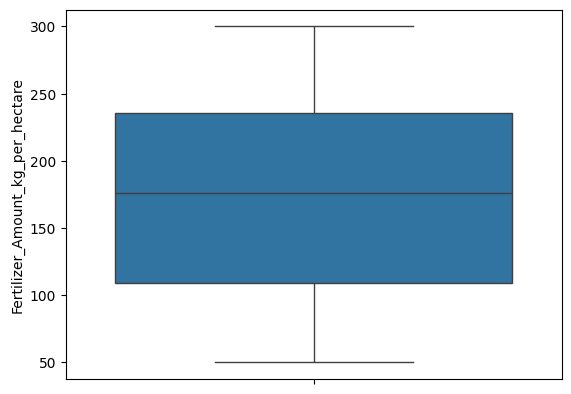

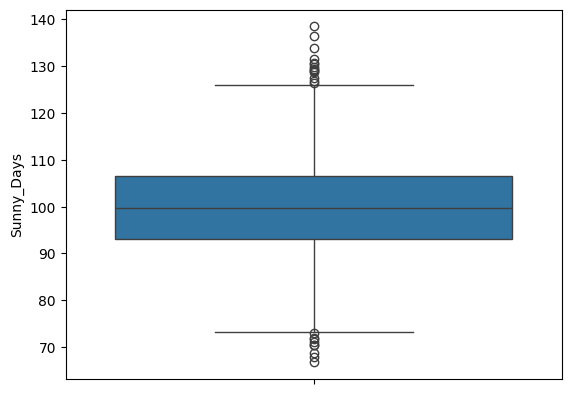

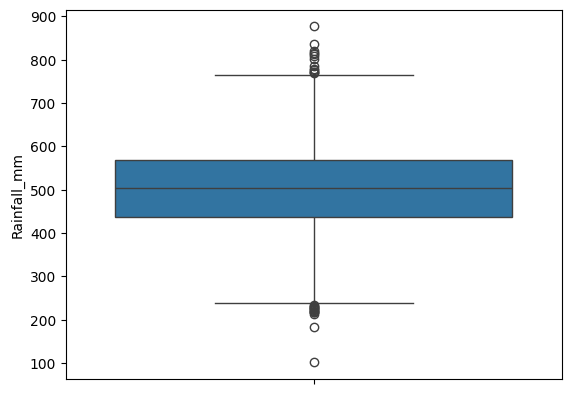

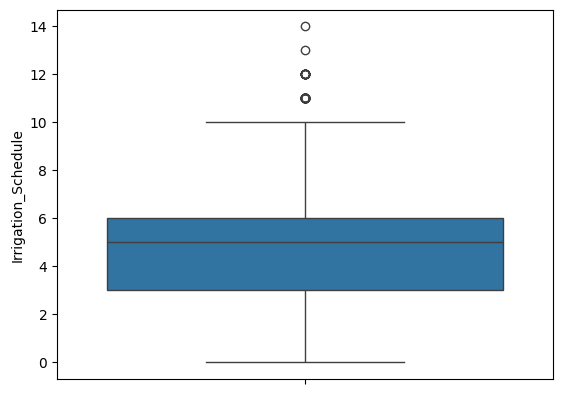

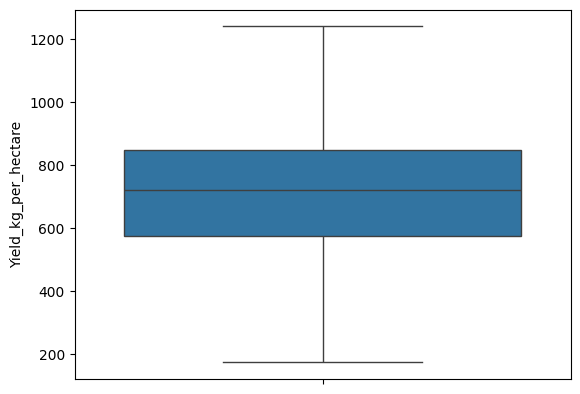

In [120]:
for i in df_drop2:
  sns.boxplot(df_drop2[i])
  plt.show()

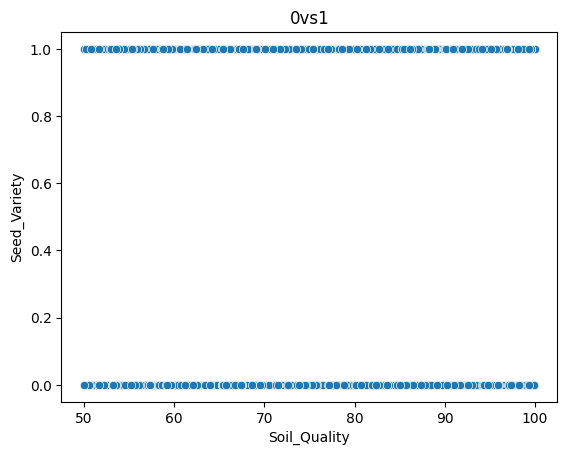

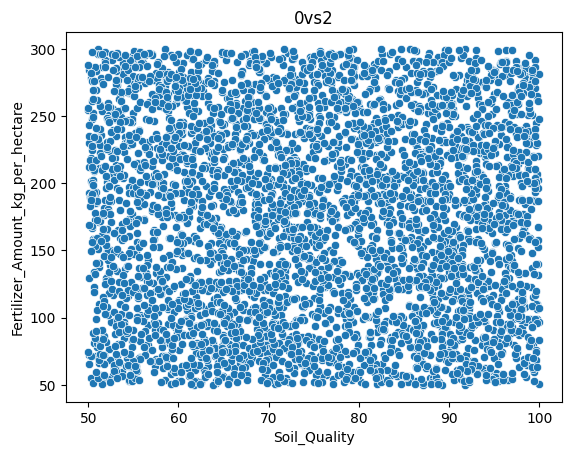

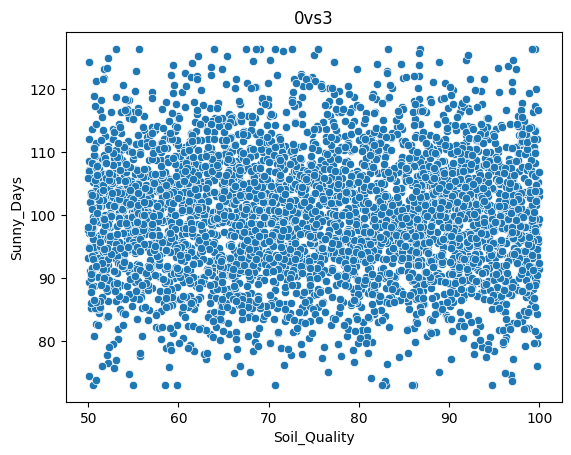

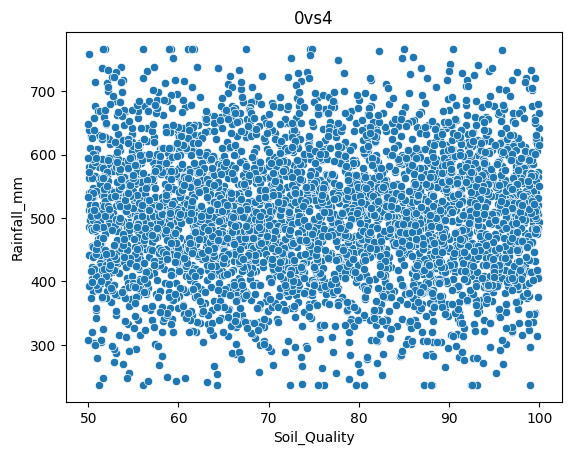

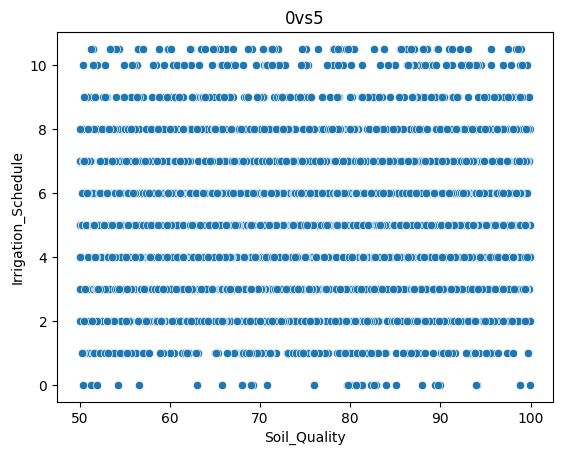

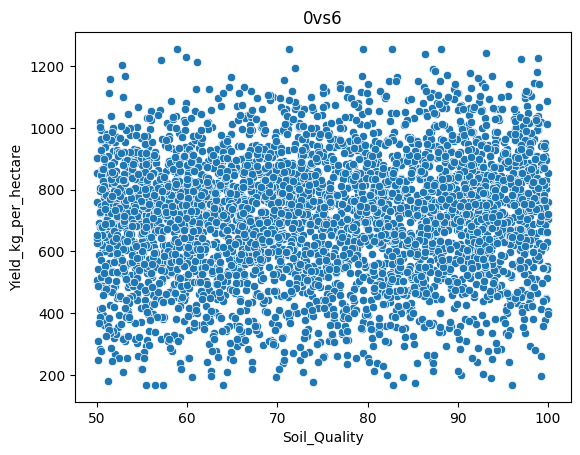

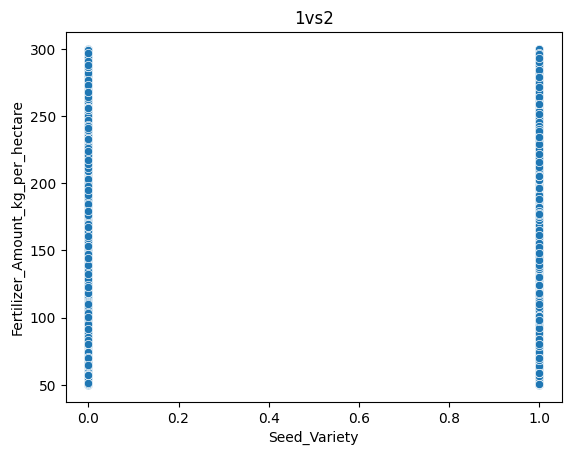

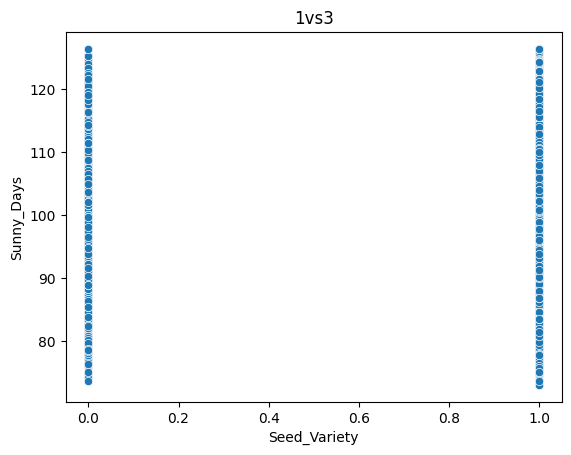

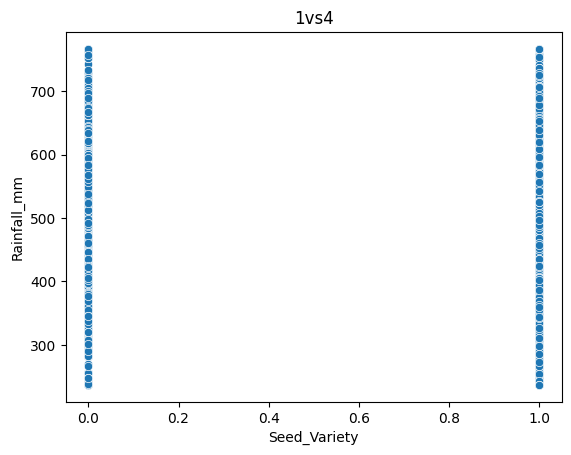

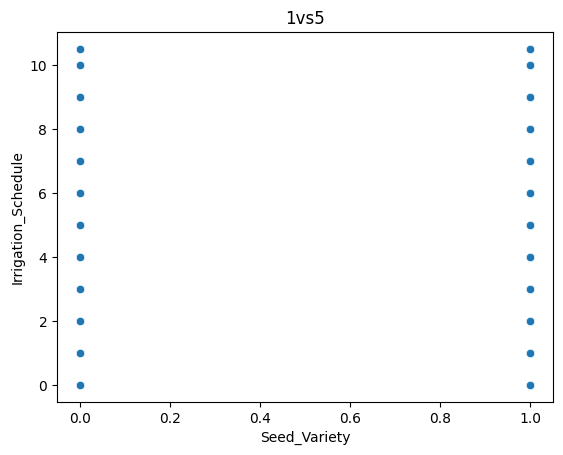

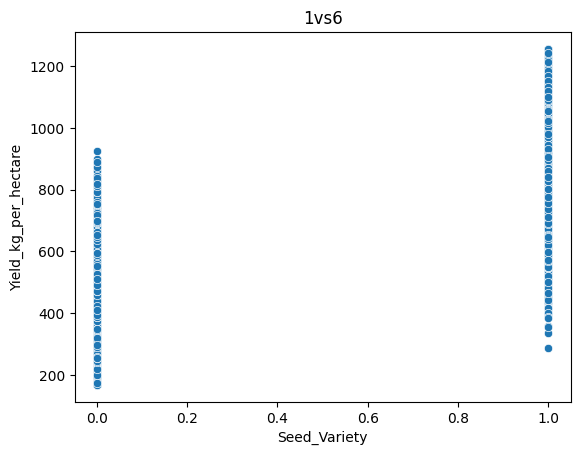

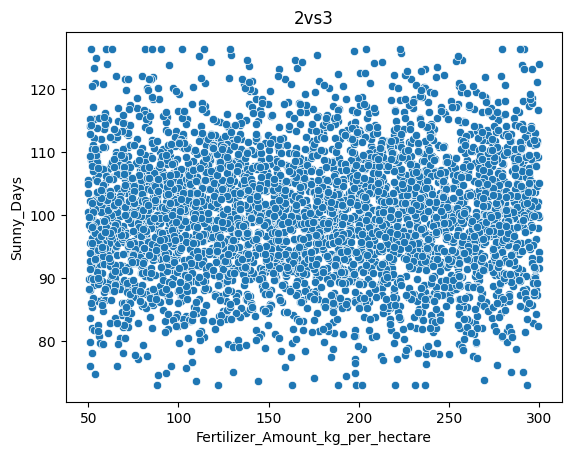

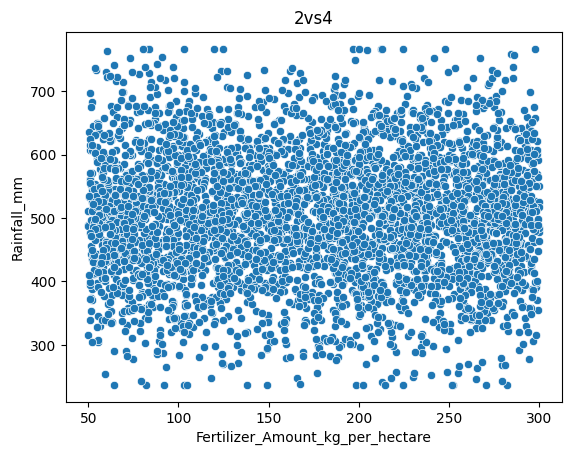

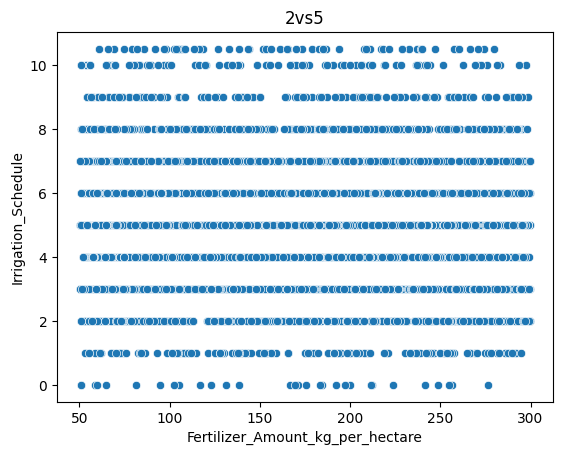

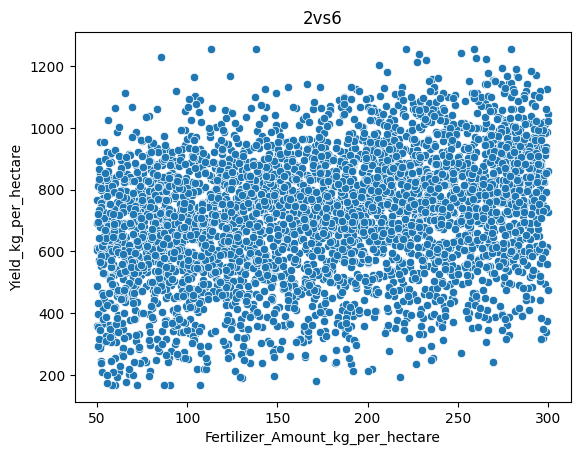

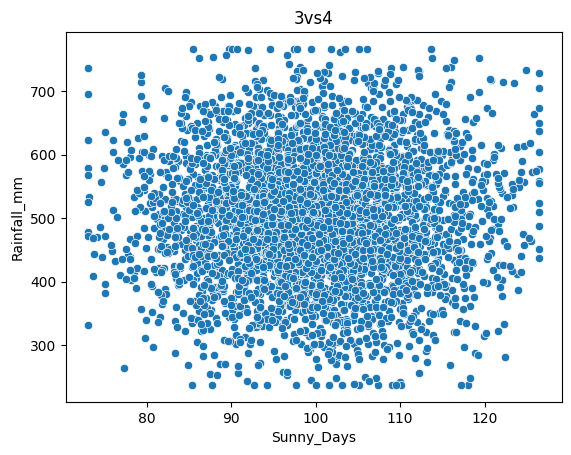

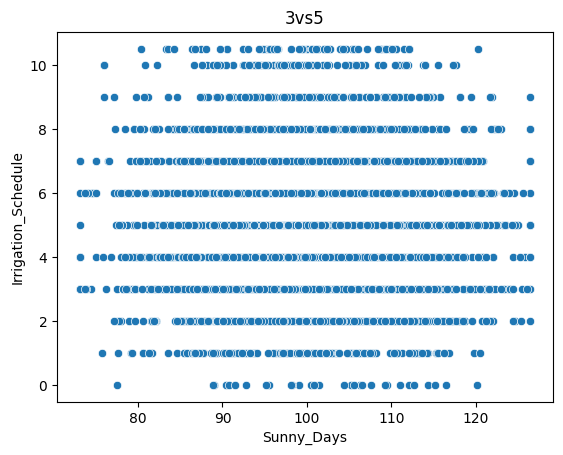

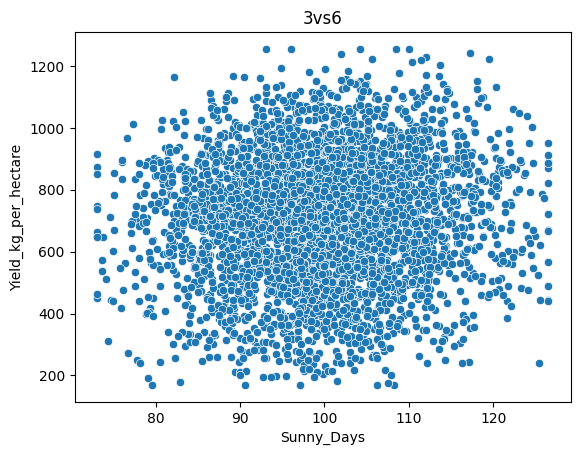

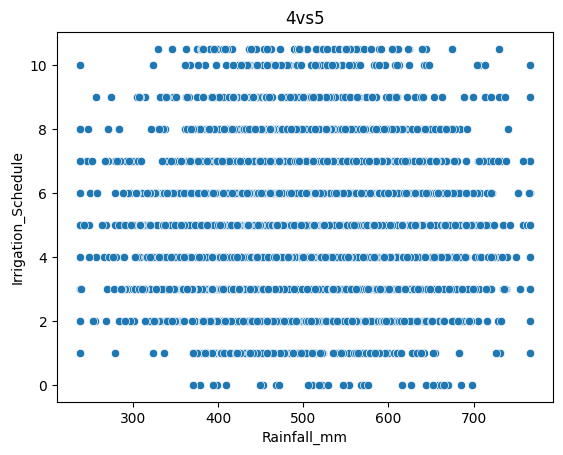

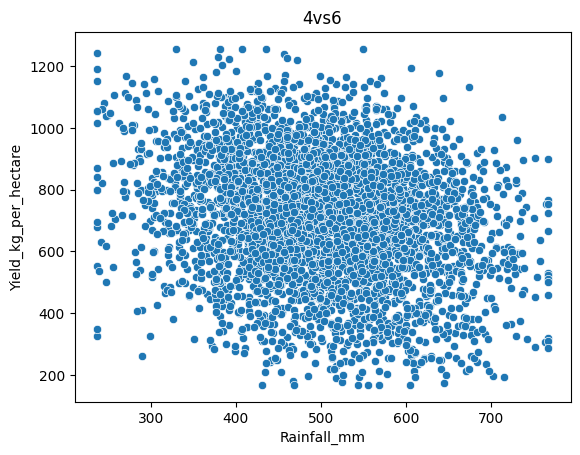

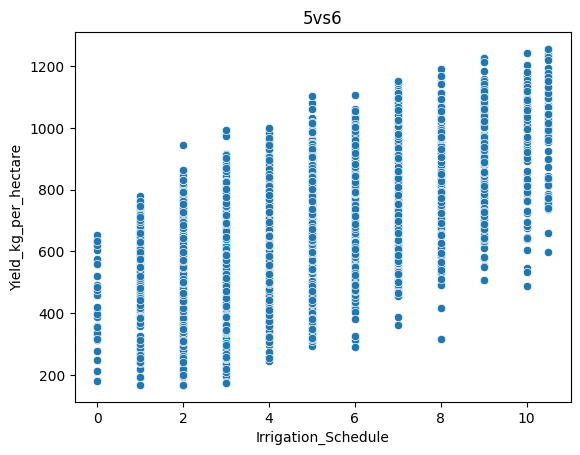

In [123]:
for i in range(len(df_win.columns)):
  for j in range(i+1,len(df_win.columns)):
    sns.scatterplot(x=df_win[df_win.columns[i]],y=df_win[df_win.columns[j]])
    plt.title(f'{i}vs{j}')
    plt.show()

<Axes: >

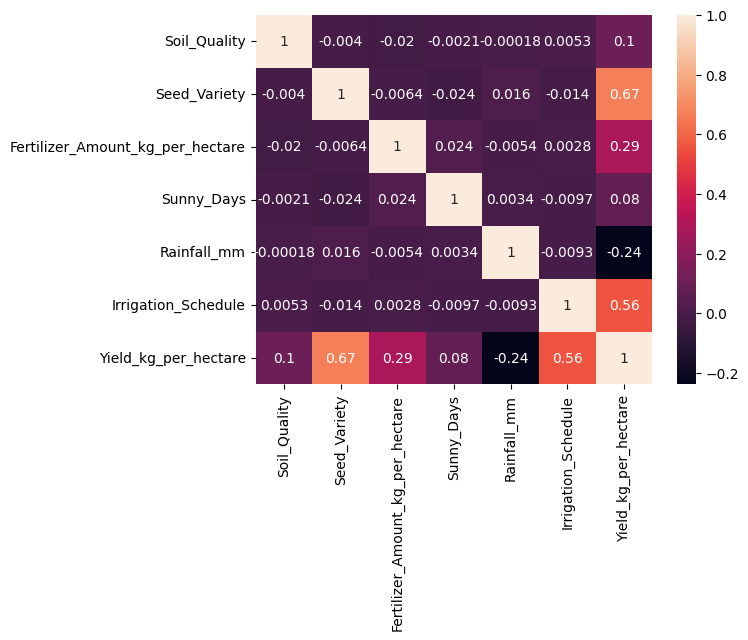

In [125]:
sns.heatmap(df_win.corr(),annot=True)

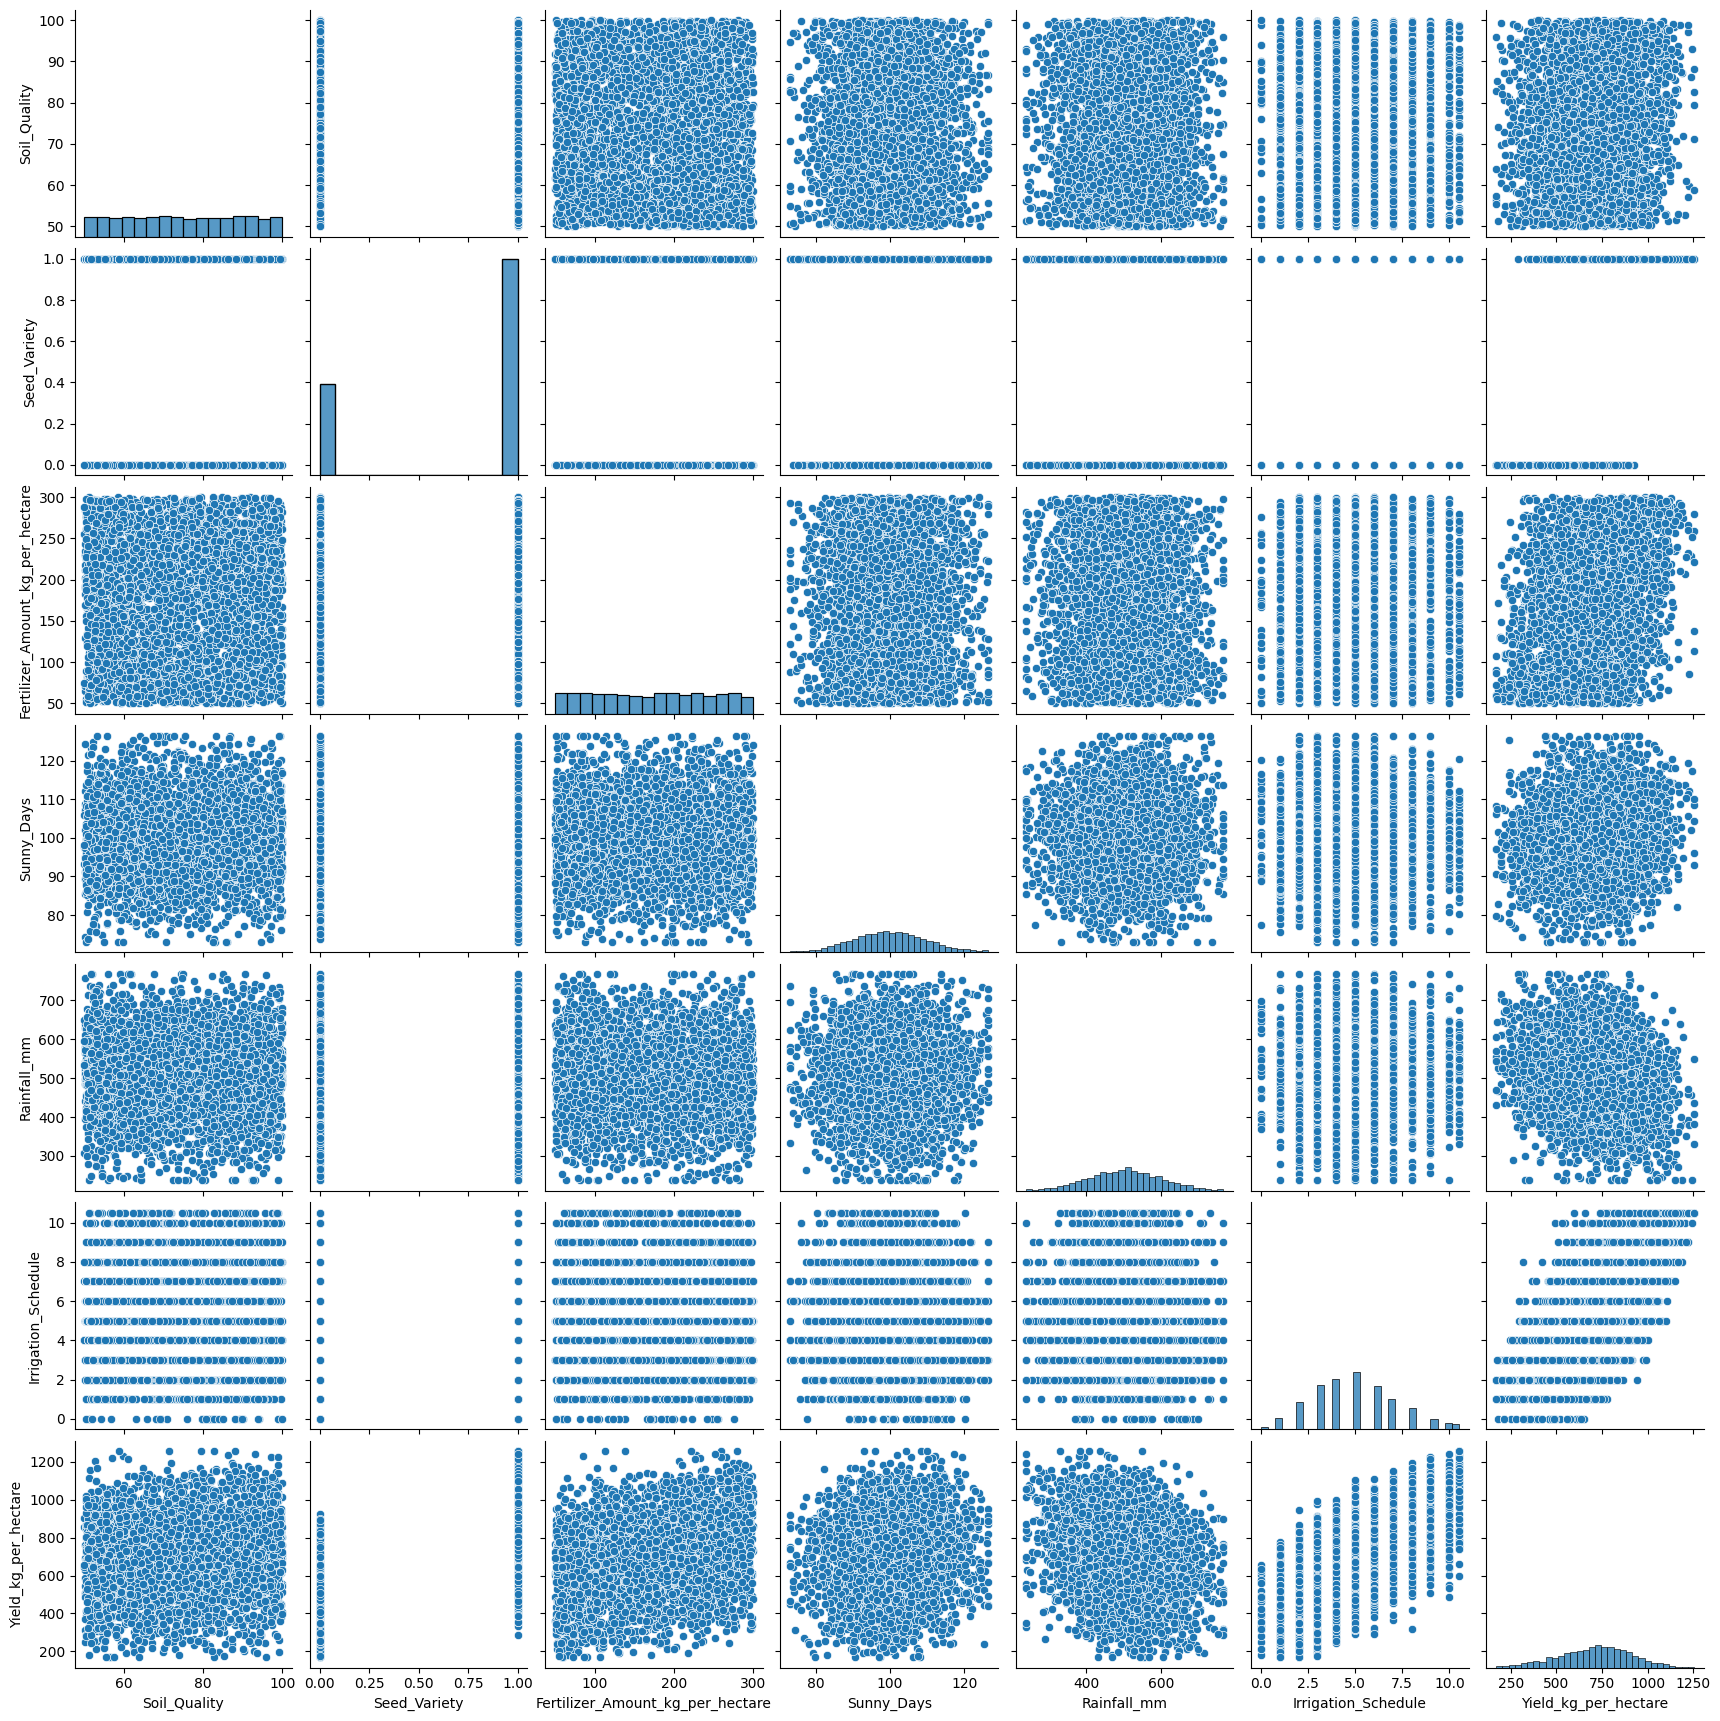

In [126]:
sns.pairplot(df_win)